In [1]:
# NB: per eseguire questo notebook come file Python, scegliere il menù "File -> Download as -> Python (.py)" .
# Da Canopy, scommentando questa istruzione si hanno i grafici nella console e non in finestre aggiuntive:
#get_ipython().magic(u'matplotlib inline')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sistemi_DLTI import *
from scipy.linalg import hankel
from testBartlett_wn import *

[ 1.    -1.7    1.07  -0.195]
na =  3


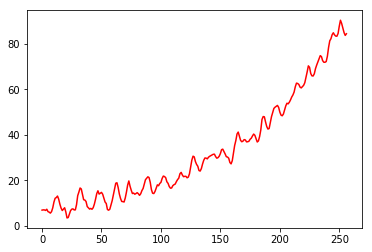

In [2]:
# serie-storiche:
N = 256
a = np.poly([0.3, 0.7+0.4j, 0.7-0.4j])   
print(a)
a /= a[0]
na = len(a) - 1
stdw = 0.9
print("na = ", na)
y = 7.345*np.exp(0.0097*np.arange(N+1)) + simula_DLTI(np.array([1.]),a,stdw*np.random.randn(N+1))
plt.figure(3); plt.plot(y,'r-'); plt.show()

trend =  [6.72826157] *exp( [0.01014321] *k)


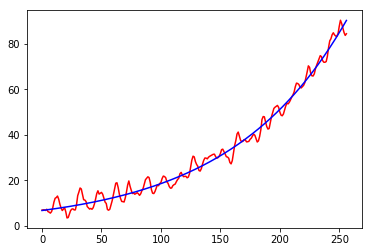

In [3]:
# stimo il trend 
vk = np.arange(0.,N+1)
Ai = np.vander(vk)
A = Ai[:,range(N-1,N+1)]
Qt,Rt = np.linalg.qr(A.copy())
b = np.atleast_2d( np.log(y) ).T
xtrend = np.linalg.solve( Rt , Qt.T@b )
trend = np.exp(xtrend[1])*np.exp(xtrend[0]*np.arange(N+1))
plt.figure(11); plt.plot(y,'r-'); plt.plot(trend,'b-');
print("trend = ", np.exp(xtrend[1]), "*exp(", xtrend[0], "*k)")

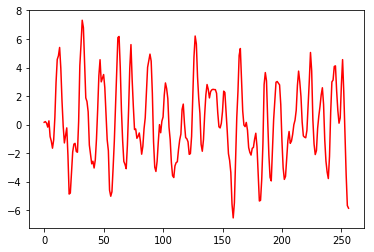

In [4]:
# elimino il trend
yflutt =  y - trend
plt.figure(21); plt.plot(yflutt,'r-');

In [5]:
max_na = na+10
# calcolo le correlazioni
corrval = np.zeros(max_na)
for i in range(0,max_na):
  corrval[i] = np.sum(np.dot(yflutt, np.roll(yflutt,-i))) / N
#endfor
#T = np.asmatrix( toeplitz(corrval[0:5], corrval[0:5]) )
#print T

a =  [ 1.    -1.7    1.07  -0.195]


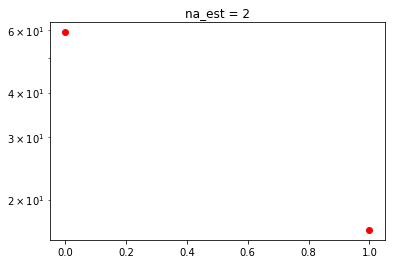

a_est =  [[ 1.        ]
 [-1.53736213]
 [ 0.7884906 ]]
S =  [59.09373488 16.42995945]


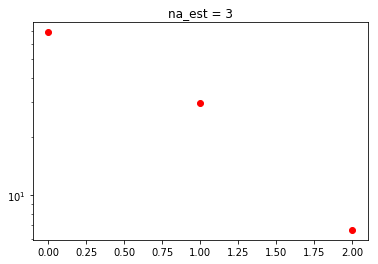

a_est =  [[ 1.        ]
 [-1.63709953]
 [ 0.98518057]
 [-0.12937269]]
S =  [68.60141743 29.76822219  6.64155051]


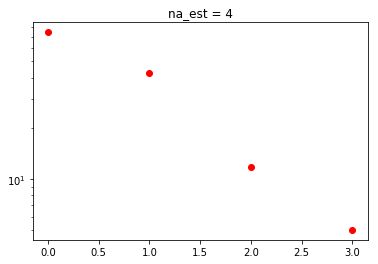

a_est =  [[ 1.        ]
 [-1.64574114]
 [ 1.04629788]
 [-0.23084959]
 [ 0.06248889]]
S =  [74.29621661 42.66601813 11.84626031  4.99716846]
S[na] / np.linalg.norm(a) =  2.2186805151315254


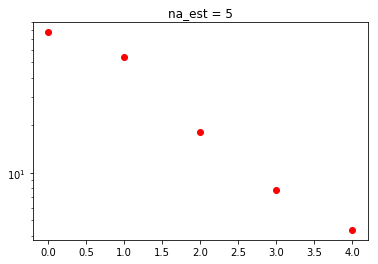

a_est =  [[ 1.        ]
 [-1.64970644]
 [ 1.05233194]
 [-0.22392173]
 [ 0.04263353]
 [ 0.01298805]]
S =  [77.3922128  54.34826747 18.21084472  7.7531016   4.35441601]


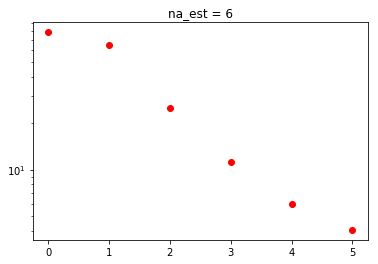

a_est =  [[ 1.        ]
 [-1.6530443 ]
 [ 1.06214073]
 [-0.23964029]
 [ 0.08441716]
 [-0.04889834]
 [ 0.03746787]]
S =  [78.76273804 64.56304745 25.37900358 11.21699932  5.96687832  4.04132796]


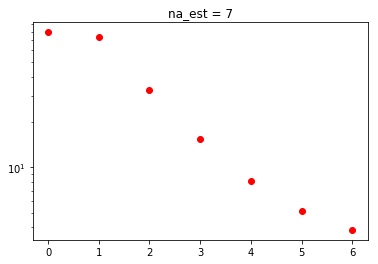

a_est =  [[ 1.        ]
 [-1.65235391]
 [ 1.06816797]
 [-0.24790633]
 [ 0.07855033]
 [ 0.02339349]
 [-0.08376571]
 [ 0.07490827]]
S =  [79.11764162 73.13453591 32.8758649  15.35465068  8.10589936  5.17153729
  3.84283947]


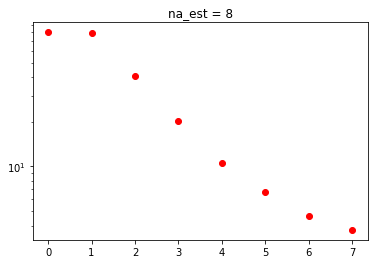

a_est =  [[ 1.        ]
 [-1.65102554]
 [ 1.06958075]
 [-0.25624495]
 [ 0.09336365]
 [ 0.00295582]
 [-0.02249008]
 [-0.01814607]
 [ 0.0565273 ]]
S =  [79.98047681 79.0104379  40.34465424 20.24992466 10.4831489   6.70454959
  4.63746705  3.7381498 ]


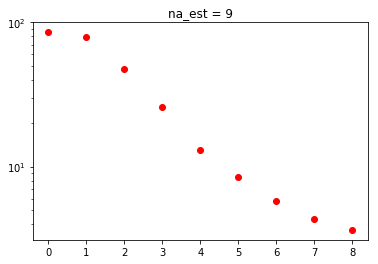

a_est =  [[ 1.        ]
 [-1.6512362 ]
 [ 1.06376624]
 [-0.24572567]
 [ 0.07949041]
 [ 0.01523135]
 [-0.02382107]
 [-0.06729901]
 [ 0.14333741]
 [-0.05412599]]
S =  [85.11856908 79.01508975 47.33221322 25.72912798 13.14249184  8.46894035
  5.7855327   4.34098827  3.65543226]


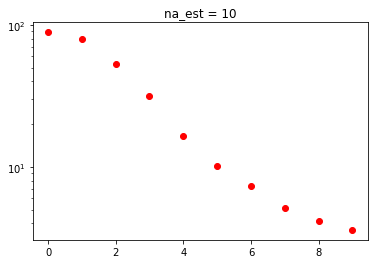

a_est =  [[ 1.        ]
 [-1.65356504]
 [ 1.07862149]
 [-0.26289015]
 [ 0.09251216]
 [-0.00327969]
 [ 0.01009086]
 [-0.11391514]
 [ 0.28822144]
 [-0.27833245]
 [ 0.13780115]]
S =  [88.77179453 79.61618656 53.26764413 31.43316704 16.44307312 10.18846938
  7.30350397  5.1027222   4.17414965  3.59289126]


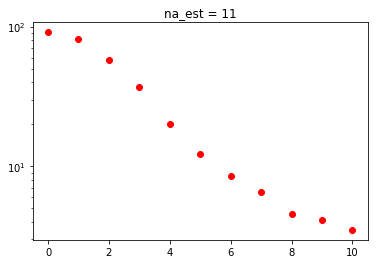

a_est =  [[ 1.00000000e+00]
 [-1.65002430e+00]
 [ 1.07297698e+00]
 [-2.57946147e-01]
 [ 8.90893445e-02]
 [ 5.89210596e-05]
 [ 6.09104230e-03]
 [-1.08187793e-01]
 [ 2.81496114e-01]
 [-2.62684579e-01]
 [ 1.15234577e-01]
 [ 1.37170702e-02]]
S =  [91.1550169  81.3037016  57.48299365 37.17991988 20.16694708 12.32227552
  8.55405835  6.51106545  4.55951801  4.1131269   3.50538922]


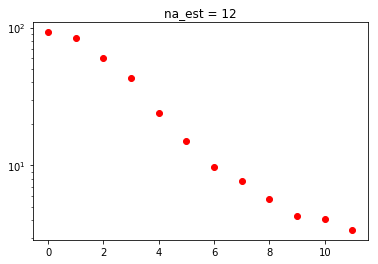

a_est =  [[ 1.00000000e+00]
 [-1.65112417e+00]
 [ 1.06277804e+00]
 [-2.30389989e-01]
 [ 5.73313733e-02]
 [ 1.29317223e-02]
 [ 9.14783088e-03]
 [-1.19550639e-01]
 [ 2.86733013e-01]
 [-2.46940442e-01]
 [-9.37824890e-04]
 [ 2.05078581e-01]
 [-1.18376907e-01]]
S =  [92.52207381 84.0862971  59.72936072 43.0655161  24.10668388 14.99583464
  9.81328649  7.72590392  5.72186815  4.28087644  4.08534197  3.41065612]


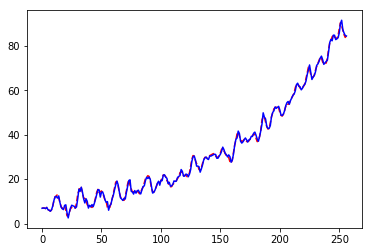

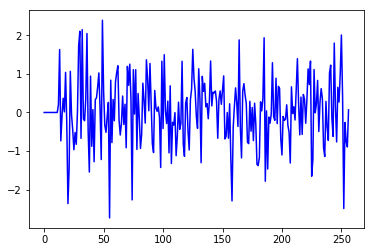

na =  3
a =  [ 1.    -1.7    1.07  -0.195]
a_est_ok =  [ 1.         -1.63709953  0.98518057 -0.12937269]
varianza dell'errore di predizione a un passo:  0.738061017989395


In [8]:
print('a = ', a)
jfig = 0
for na_est in range(2,max_na):
  #A = np.asmatrix( hankel(yflutt[1:N-na_est+1], yflutt[N-na_est:N-1+1]) ) #attuale
  A = hankel(yflutt[1:N-na_est], yflutt[N-na_est-1:N-1])
  U,S,V = np.linalg.svd(A.copy());  V = V.T
  plt.figure(jfig*20+na_est); plt.semilogy(S,'ro'); plt.title('na_est = ' + str(na_est)); plt.show()
  b = np.atleast_2d( -yflutt[na_est+1:N] ).T
  Q,R = np.linalg.qr(A.copy())
  # risolvo il sistema (10.2.10) :
  a_est = np.ones((na_est+1,1))
  a_est[0:na_est] = np.linalg.solve( R , Q.T@b )
  a_est = a_est[range(na_est,-1,-1)]
  print('a_est = ', a_est)
  print("S = ",S)
  if na_est == na:
    a_est_ok = np.squeeze( a_est.copy() )
  #endif
  if na_est == na+1:
    print("S[na] / np.linalg.norm(a) = ",S[na] / np.linalg.norm(a))
  #endif
  jfig += 1
#endfor
# errore di predizione a un passo:
pe = np.zeros(N+1)
y_est = yflutt.copy()
for i in range(na_est,N+1):
  y_est[i] = 1./a_est_ok[0] * np.sum( -a_est_ok[1:na+1]*yflutt[i-1:i-na-1:-1] )
  pe[i] = yflutt[i] - y_est[i]
#endfor
y_est = y_est + trend
plt.figure(303); plt.plot(y,'r--'); plt.plot(y_est,'b-'); plt.show()
plt.figure(333); plt.plot(pe,'b-'); plt.show()
print("na = ",na)
print("a = ",a)
print("a_est_ok = ",a_est_ok)
print("varianza dell'errore di predizione a un passo: ", np.var(pe))

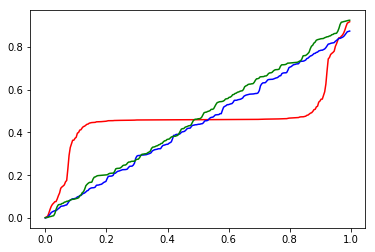

In [9]:
# vediamo se ho "sbiancato" la serie; applico il periodogramma cumulato di Bartlett ad "yflutt" ed a "pe" :
CP_yf,f = testBartlett_wn(yflutt)
plt.figure(401); plt.plot(f, CP_yf, 'r-');
CP_pe,f = testBartlett_wn(pe)
plt.plot(f, CP_pe, 'b-')
# per confronto riporto il periodogramma cumulato del rumore bianco:
var_s = 10
wn = np.sqrt(var_s) * np.random.randn(N)
CP_wn,f = testBartlett_wn(wn)
plt.plot(f, CP_wn, 'g-'); 
plt.show()

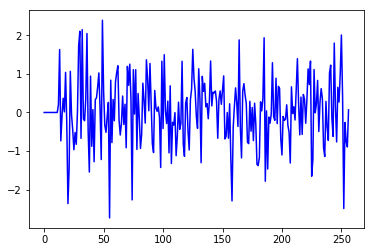

In [10]:
plt.figure(501); plt.plot(pe,'b-'); plt.show()

In [ ]:
# ripetiamo il calcolo dell'errore di predizione per una diversa realizzazione:
y = 7.345*np.exp(0.0097*np.arange(N+1)) + simula_DLTI(np.array([1.]),a,stdw*np.random.randn(N+1))
plt.figure(601); plt.plot(y,'r-'); plt.show()
b = np.atleast_2d( np.log(y) ).T
xtrend = np.linalg.solve( Rt , Qt.T@b )
trend = np.exp(xtrend[1])*np.exp(xtrend[0]*np.arange(N+1))
yflutt =  y - trend
for i in range(na_est,N+1):
  y_est[i] = 1./a_est_ok[0] * np.sum( -a_est_ok[1:na]*yflutt[i-1:i-na:-1] )
  pe[i] = yflutt[i] - y_est[i]
#endfor
print("varianza dell'errore di predizione a un passo: ", np.var(pe),"   (stdev=",sqrt(np.var(pe)),")")